In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import levene, ttest_ind, pearsonr
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import math
from scipy import stats
import numpy as np
import re
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import warnings
import wrangle as w
import re
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import sklearn.metrics as metric
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing as pre

In [2]:
sns.set(rc={'figure.figsize':(32,18)})

In [3]:
sns.set(font_scale=2)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df=w.get_explore_data()

In [6]:
df=w.get_contest_data(df)

In [7]:
df.head(50)

region  elevation  lat       lon  startdate  potential_evap  precip  \
0     BSh        200  0.0  0.833333 2014-09-01          237.00   94.31   
1     BSh        200  0.0  0.833333 2014-09-02          228.90  100.85   
2     BSh        200  0.0  0.833333 2014-09-03          220.69  101.25   
3     BSh        200  0.0  0.833333 2014-09-04          225.28  101.90   
4     BSh        200  0.0  0.833333 2014-09-05          237.24   82.95   
5     BSh        200  0.0  0.833333 2014-09-06          237.87   79.11   
6     BSh        200  0.0  0.833333 2014-09-07          236.36   81.54   
7     BSh        200  0.0  0.833333 2014-09-08          233.36   87.87   
8     BSh        200  0.0  0.833333 2014-09-09          233.82   96.14   
9     BSh        200  0.0  0.833333 2014-09-10          229.74   96.13   
10    BSh        200  0.0  0.833333 2014-09-11          220.59   97.86   
11    BSh        200  0.0  0.833333 2014-09-12          208.32   98.12   
12    BSh        200  0.0  0.833333 2014-09-13          198.76   98.15   
13    BSh        200  0.0  0.833333 2014-09-14          196.75   81.58   
14    BSh        200  0.0  0.833333 2014-09-15          195.16   62.01   
15    BSh        200  0.0  0.833333 2014-09-16          195.87   55.46   
16    BSh        200  0.0  0.833333 2014-09-17          197.96   55.68   
17    BSh        200  0.0  0.833333 2014-09-18          201.64   53.94   
18    BSh        200  0.0  0.833333 2014-09-19          201.59   53.94   
19    BSh        200  0.0  0.833333 2014-09-20          204.63   58.25   
20    BSh        200  0.0  0.833333 2014-09-21          216.39   63.28   
21    BSh        200  0.0  0.833333 2014-09-22          228.88   56.04   
22    BSh        200  0.0  0.833333 2014-09-23          230.29   47.77   
23    BSh        200  0.0  0.833333 2014-09-24          232.52   47.77   
24    BSh        200  0.0  0.833333 2014-09-25          238.10   46.11   
25    BSh        200  0.0  0.833333 2014-09-26          246.83   45.85   
26    BSh        200  0.0  0.833333 2014-09-27          265.05   45.82   
27    BSh        200  0.0  0.833333 2014-09-28          272.41   29.65   
28    BSh        200  0.0  0.833333 2014-09-29          271.33   12.95   
29    BSh        200  0.0  0.833333 2014-09-30          283.48   12.99   
30    BSh        200  0.0  0.833333 2014-10-01          295.56   12.37   
31    BSh        200  0.0  0.833333 2014-10-02          296.27   12.04   
32    BSh        200  0.0  0.833333 2014-10-03          296.27   12.04   
33    BSh        200  0.0  0.833333 2014-10-04          302.29    7.72   
34    BSh        200  0.0  0.833333 2014-10-05          297.77    0.18   
35    BSh        200  0.0  0.833333 2014-10-06          284.35    0.56   
36    BSh        200  0.0  0.833333 2014-10-07          274.58    6.23   
37    BSh        200  0.0  0.833333 2014-10-08          263.68    7.96   
38    BSh        200  0.0  0.833333 2014-10-09          251.84   10.98   
39    BSh        200  0.0  0.833333 2014-10-10          239.36   10.98   
40    BSh        200  0.0  0.833333 2014-10-11          226.89   10.98   
41    BSh        200  0.0  0.833333 2014-10-12          228.63   10.98   
42    BSh        200  0.0  0.833333 2014-10-13          237.68   10.91   
43    BSh        200  0.0  0.833333 2014-10-14          233.77   10.87   
44    BSh        200  0.0  0.833333 2014-10-15          225.43   10.87   
45    BSh        200  0.0  0.833333 2014-10-16          217.21   10.87   
46    BSh        200  0.0  0.833333 2014-10-17          208.81   10.87   
47    BSh        200  0.0  0.833333 2014-10-18          199.79   10.98   
48    BSh        200  0.0  0.833333 2014-10-19          203.79   19.03   
49    BSh        200  0.0  0.833333 2014-10-20          216.33   18.65   

    barometric_pressure  all_atmos_precip  relative_humidity  sea_level_press  \
0              98644.97             42.45              81.72        101352.08   
1              98686.80             42.66              82.56      

# Getting mean_temp per unique lat and lon by region

In [8]:
df['region_latlon_mean_temp'] = df.groupby(['region', 'lat', 'lon'])['mean_temp'].transform('mean')


<AxesSubplot:xlabel='region', ylabel='region_latlon_mean_temp'>

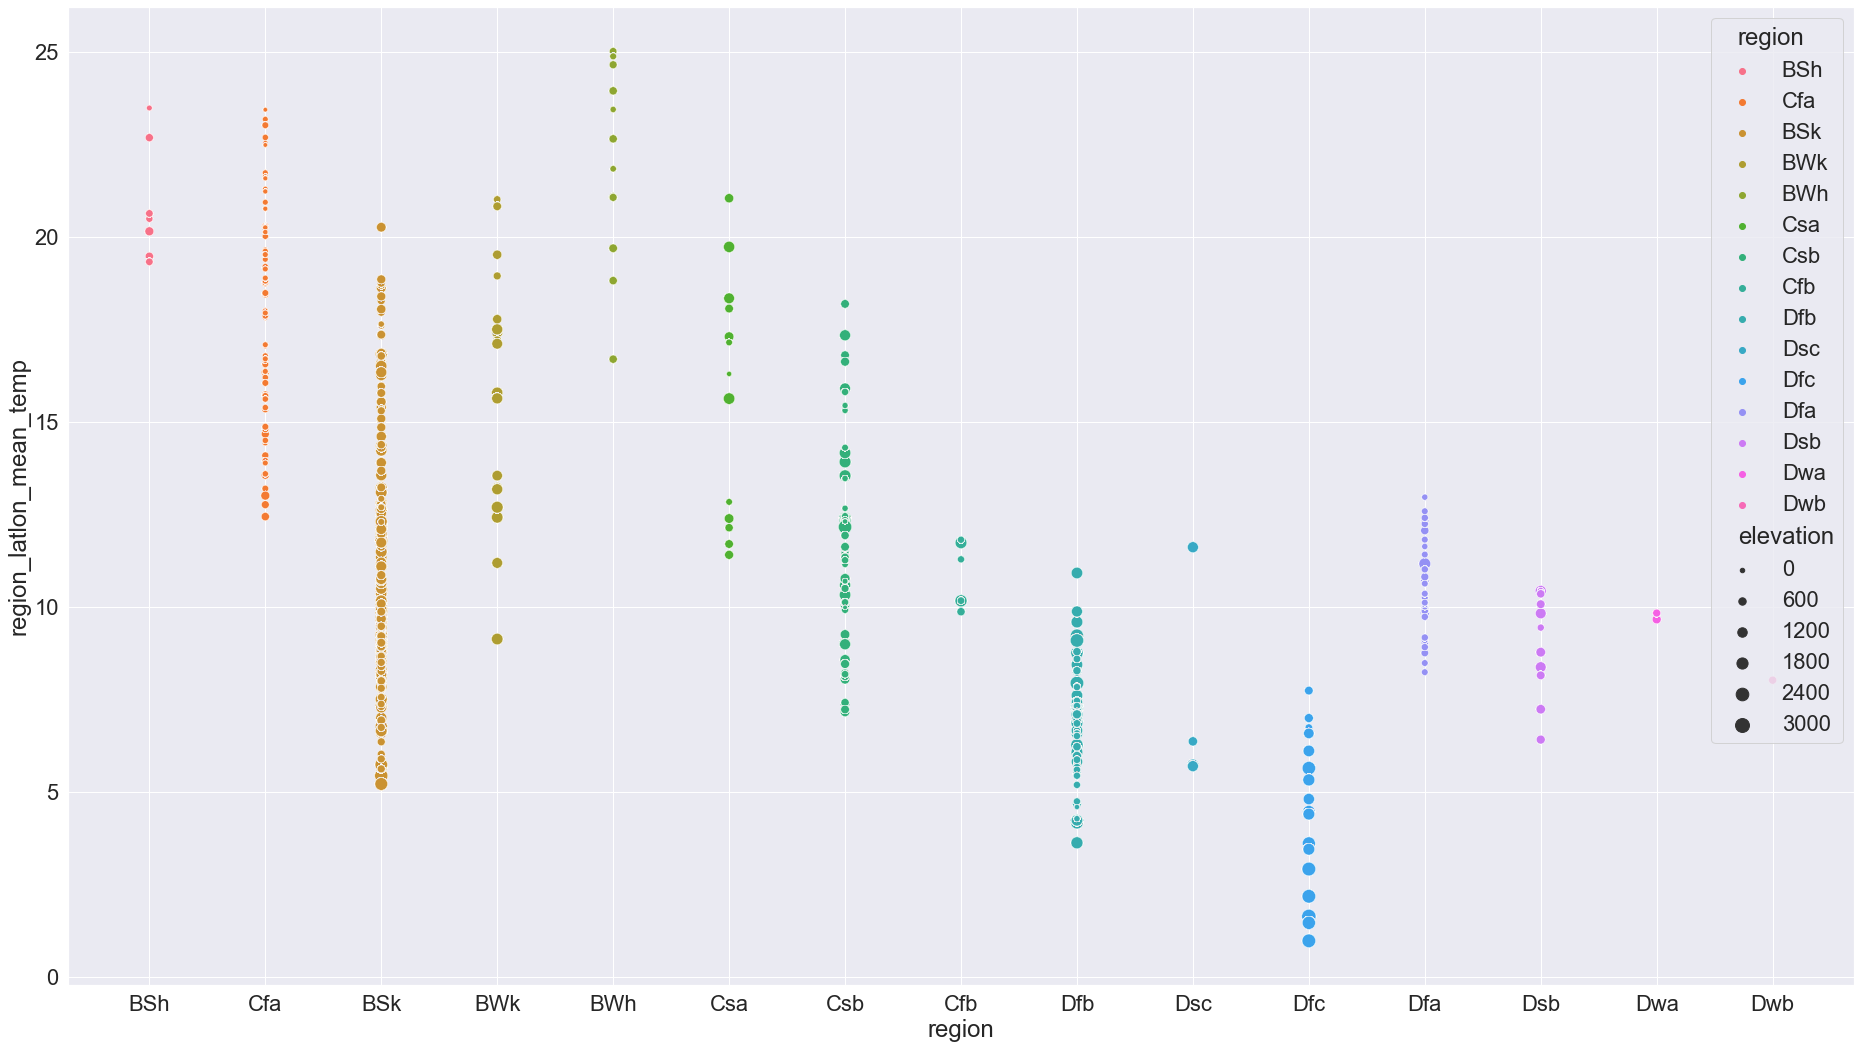

In [9]:
sns.scatterplot(data=df,  x="region", y='region_latlon_mean_temp', hue="region", size="elevation", sizes=(20, 200))

In [10]:
df['region_elevation_mean_temp'] = df.groupby(['region', 'elevation'])['mean_temp'].transform('mean')

<AxesSubplot:xlabel='region', ylabel='region_elevation_mean_temp'>

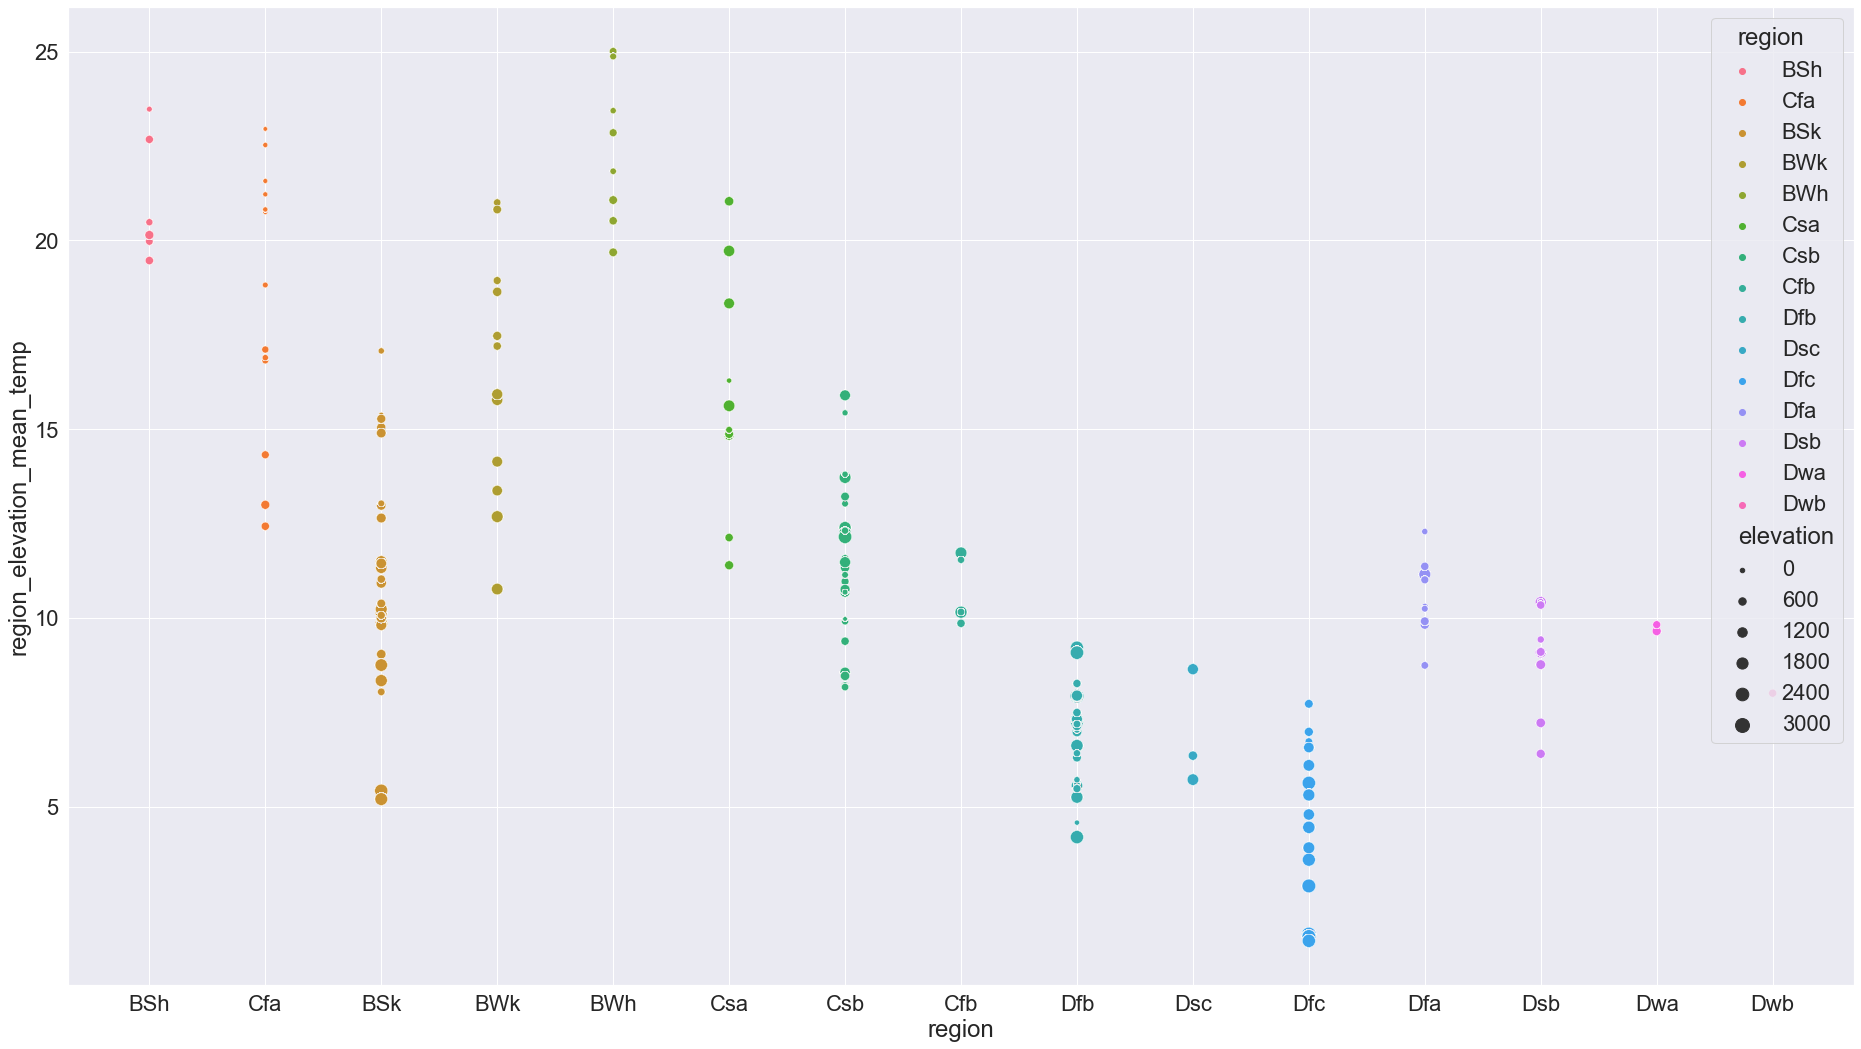

In [11]:
sns.scatterplot(data=df, x="region", y='region_elevation_mean_temp',  hue="region", size="elevation", sizes=(20, 200))

In [12]:
df['region_bar_press_mean_temp'] = df.groupby(['region', 'barometric_pressure'])['mean_temp'].transform('mean')

<AxesSubplot:xlabel='region', ylabel='region_bar_press_mean_temp'>

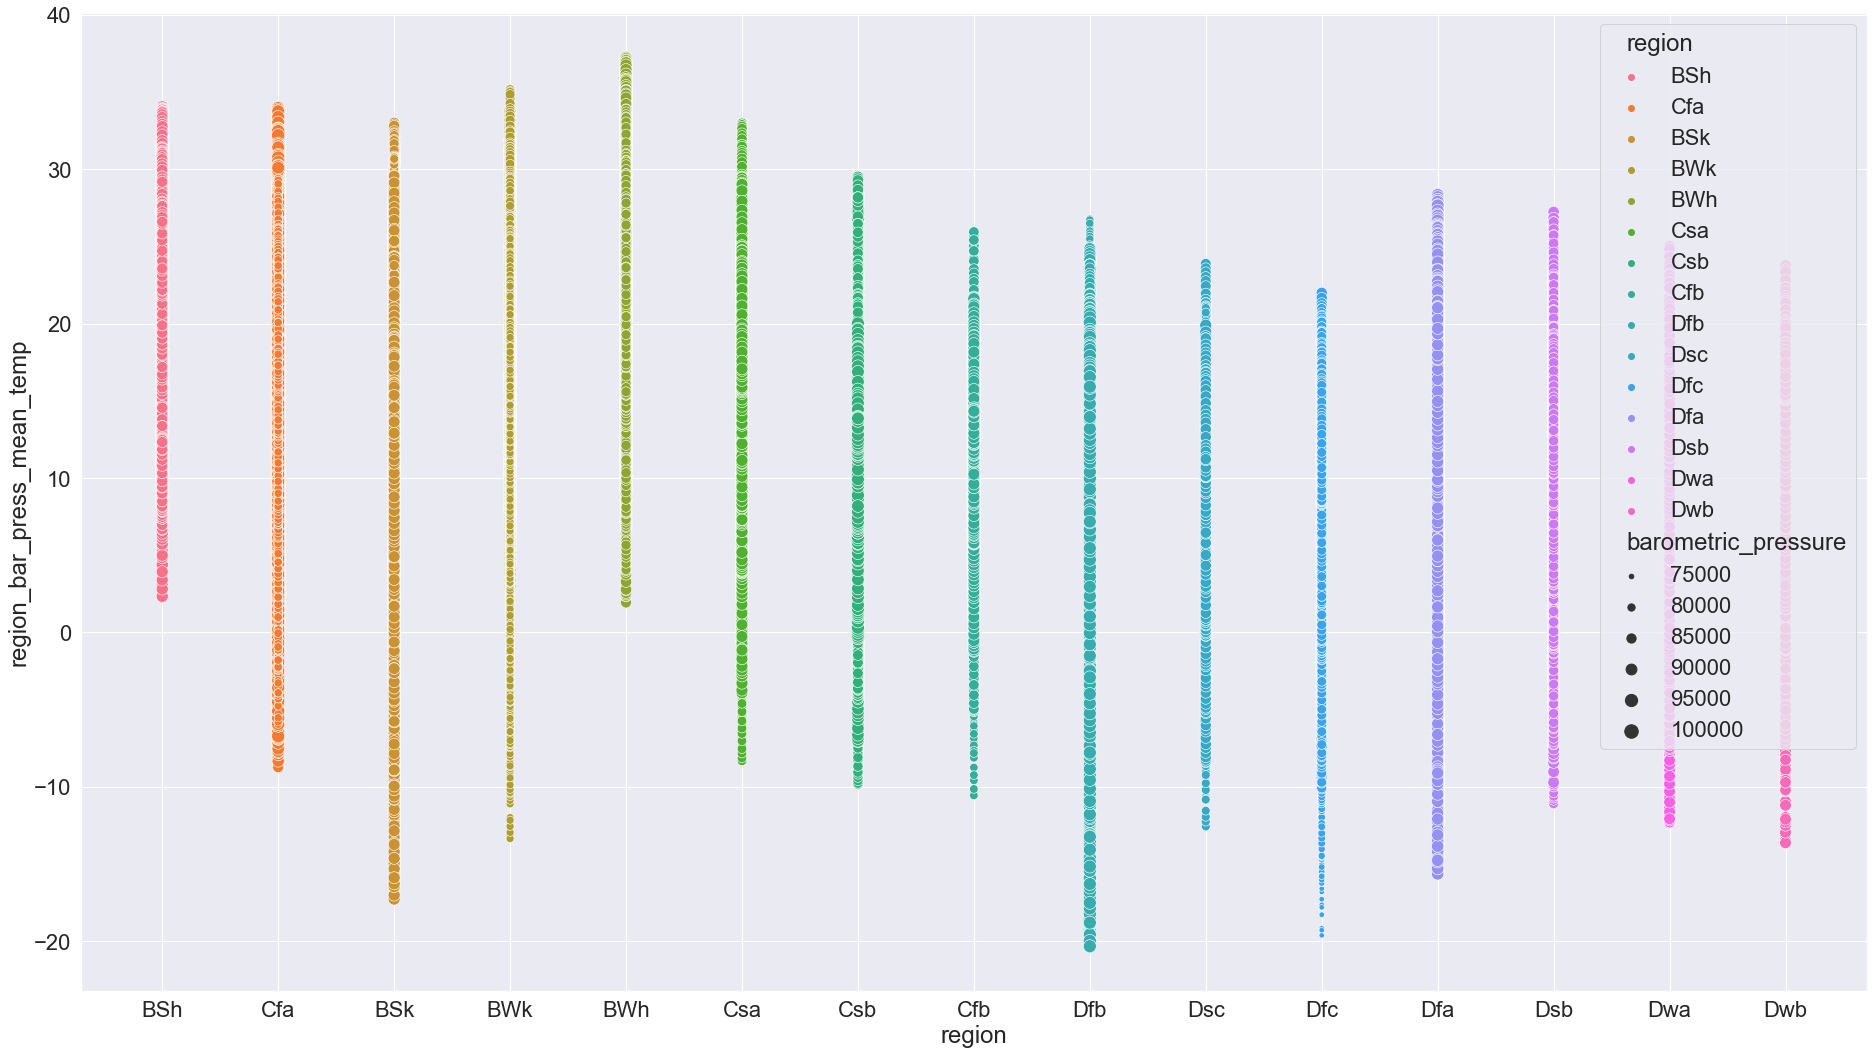

In [13]:
sns.scatterplot(data=df, x="region", y='region_bar_press_mean_temp',  hue="region", size="barometric_pressure", sizes=(20, 200))

In [14]:
df['atmosphere_mean_temp'] = df.groupby(['region', 'height_500_mb', 'zonal_wind_250mb', 'long_wind_250mb', 'lat', 'lon', 'barometric_pressure'])['mean_temp'].transform('mean')

<AxesSubplot:xlabel='region', ylabel='atmosphere_mean_temp'>

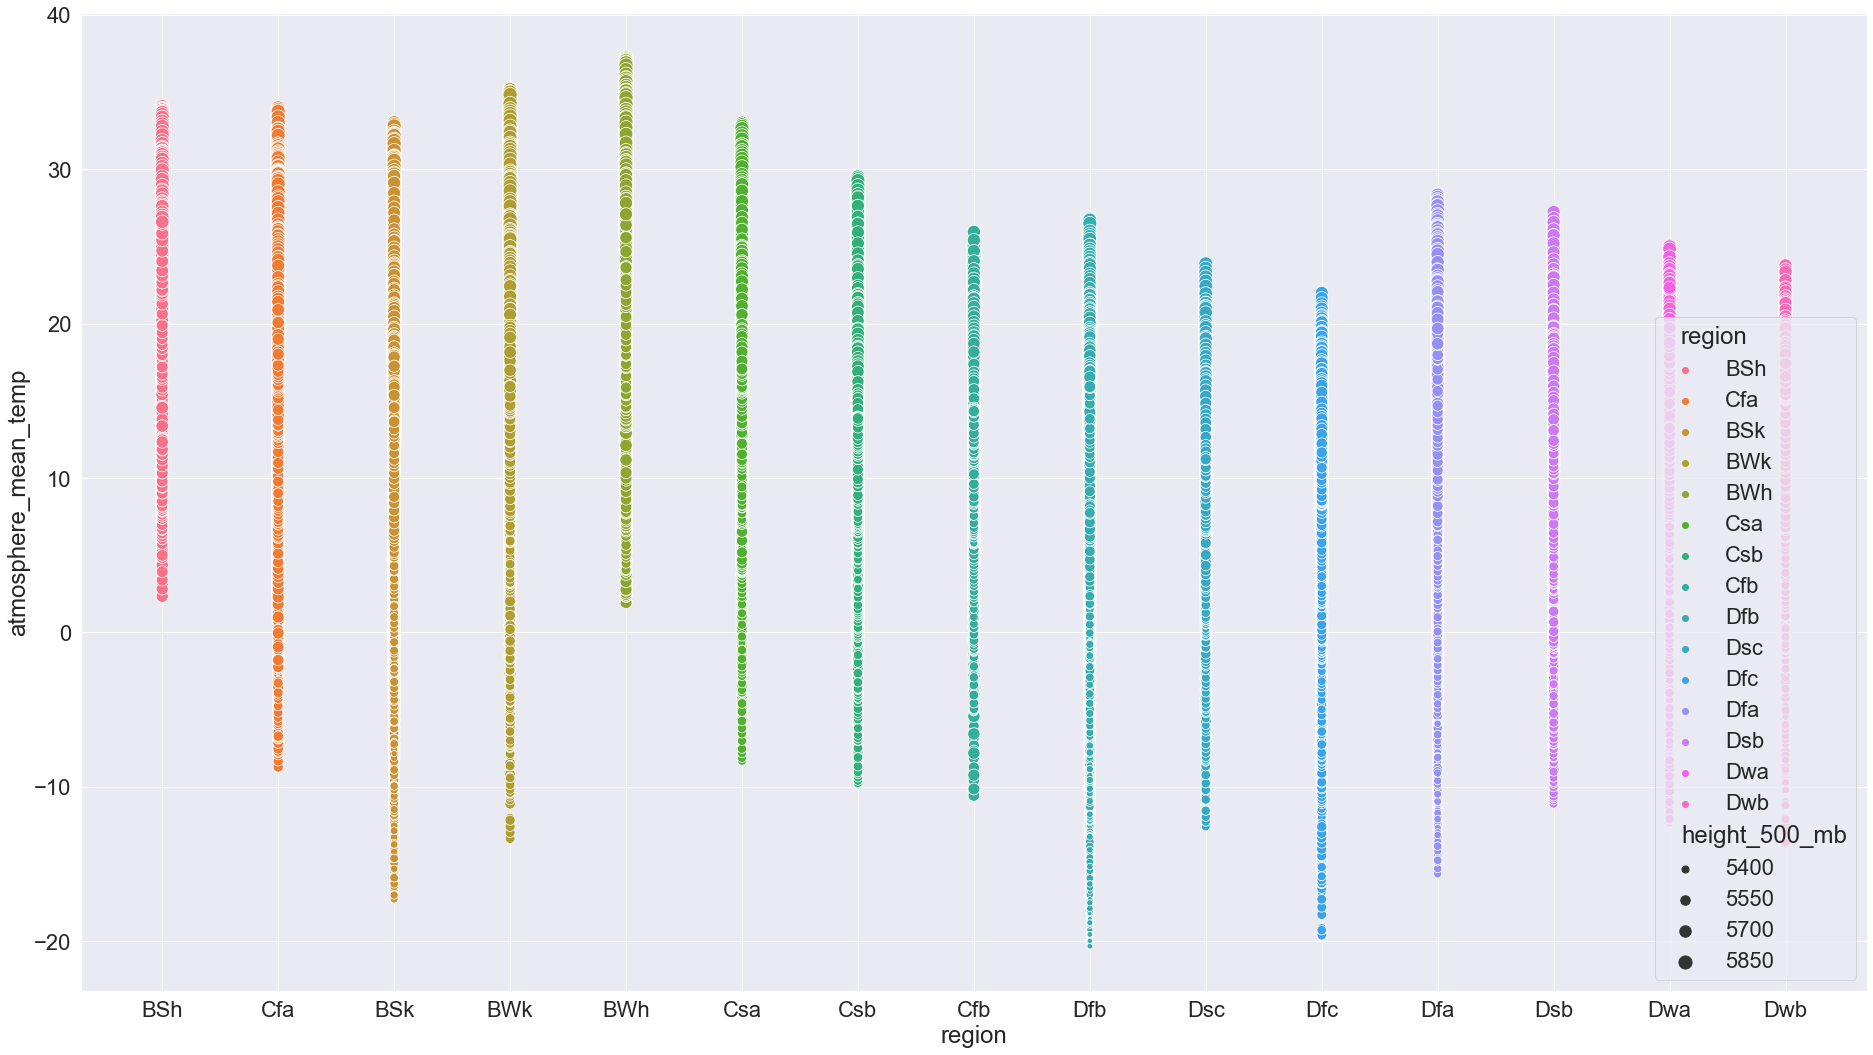

In [15]:
sns.scatterplot(data=df, x="region", y='atmosphere_mean_temp',  hue="region", size="height_500_mb", sizes=(20, 200))

In [16]:
df['reg_barpress_precip_mean_temp'] = df.groupby(['region', 'barometric_pressure', 'precip'])['mean_temp'].transform('mean')

<AxesSubplot:xlabel='region', ylabel='reg_barpress_precip_mean_temp'>

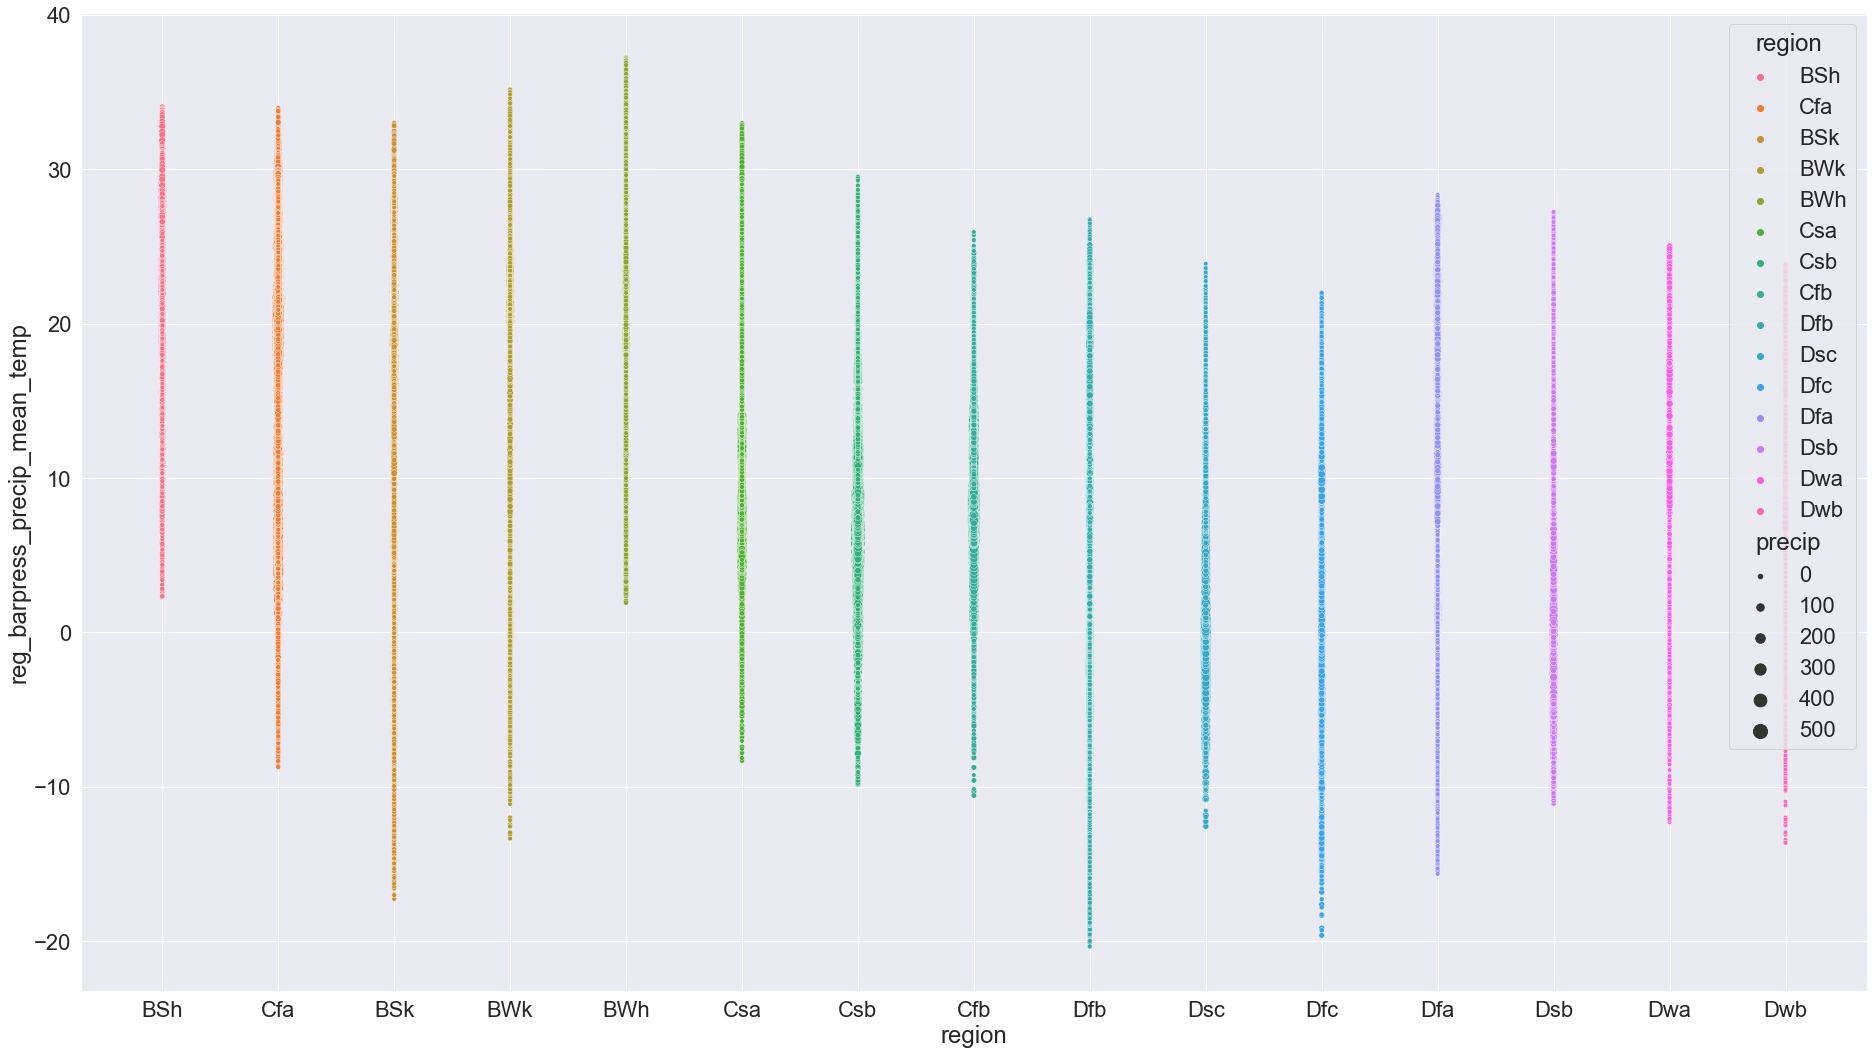

In [17]:
sns.scatterplot(data=df, x="region", y='reg_barpress_precip_mean_temp',  hue="region", size="precip", sizes=(20, 200))

<AxesSubplot:xlabel='precip', ylabel='reg_barpress_precip_mean_temp'>

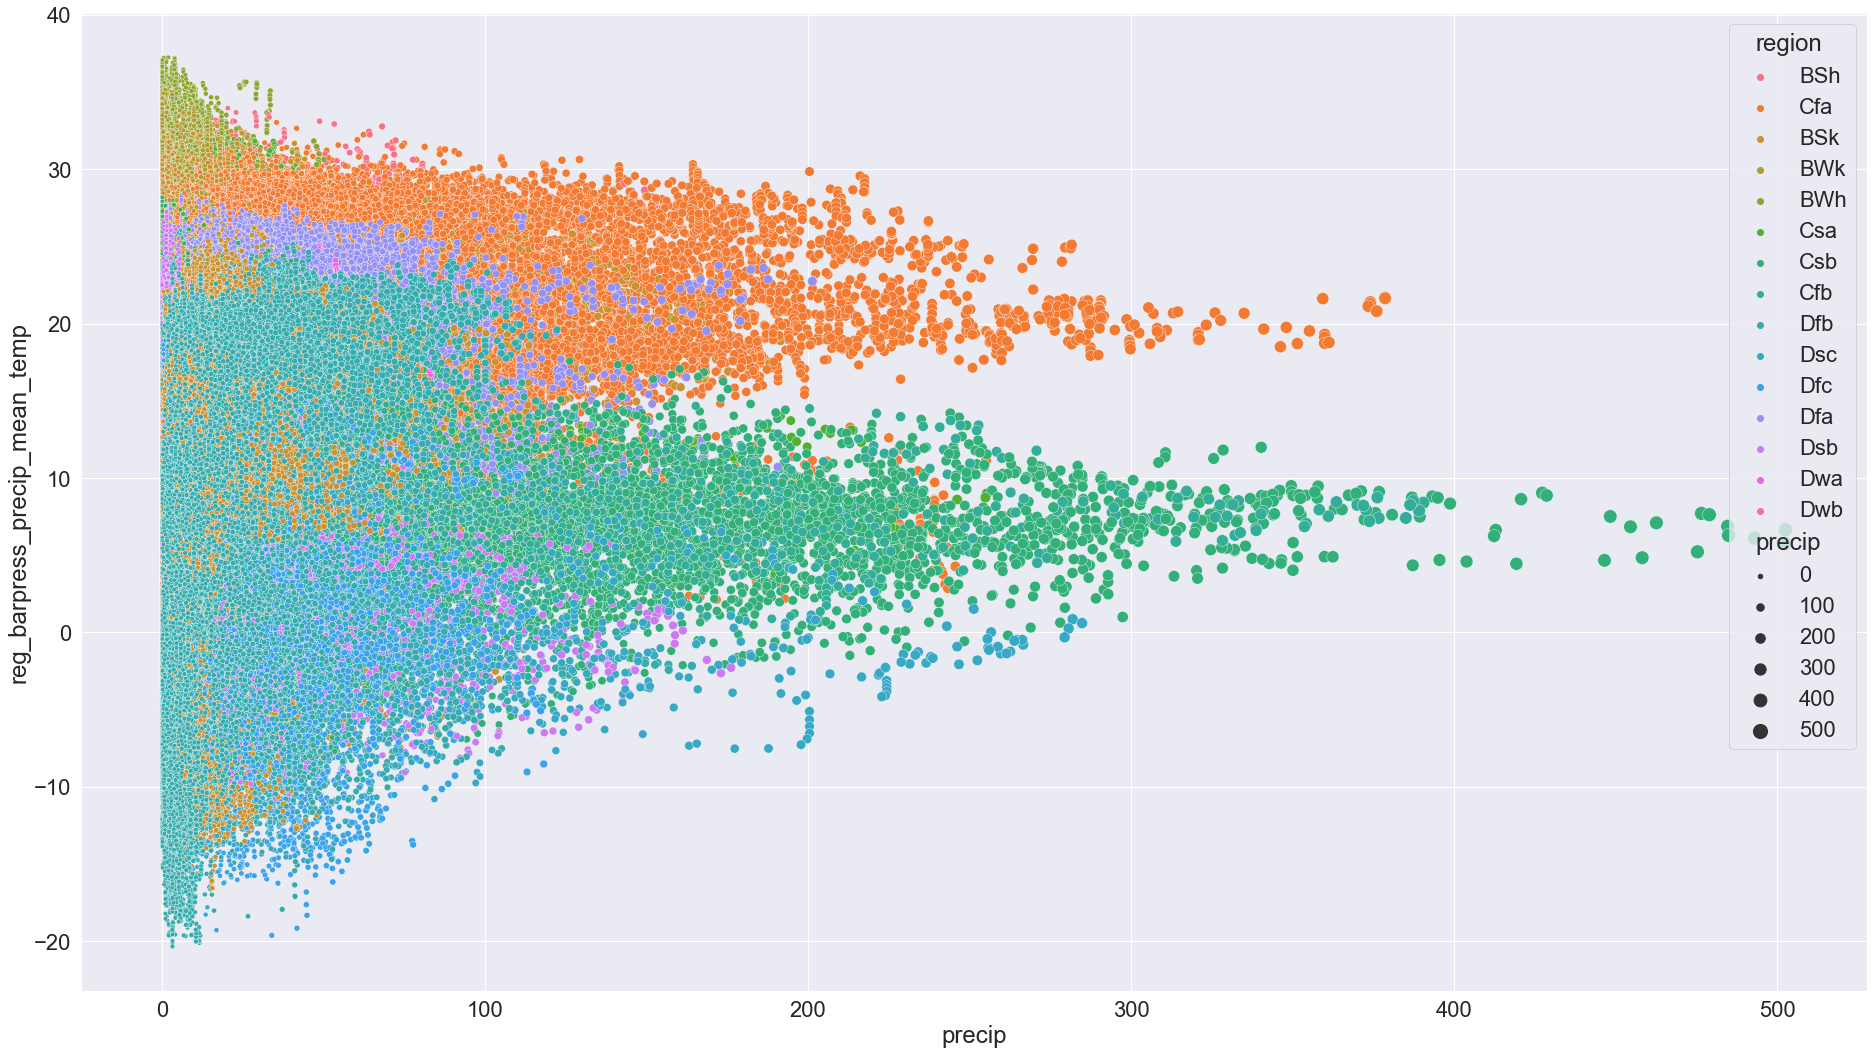

In [18]:
sns.scatterplot(data=df, x="precip", y='reg_barpress_precip_mean_temp',  hue="region", size="precip", sizes=(20, 200))

In [19]:
df['reg_latlon_850_mean_temp'] = df.groupby(['region', 'lat', 'lon', 'height_850_mb'])['mean_temp'].transform('mean')


<AxesSubplot:xlabel='height_850_mb', ylabel='reg_latlon_850_mean_temp'>

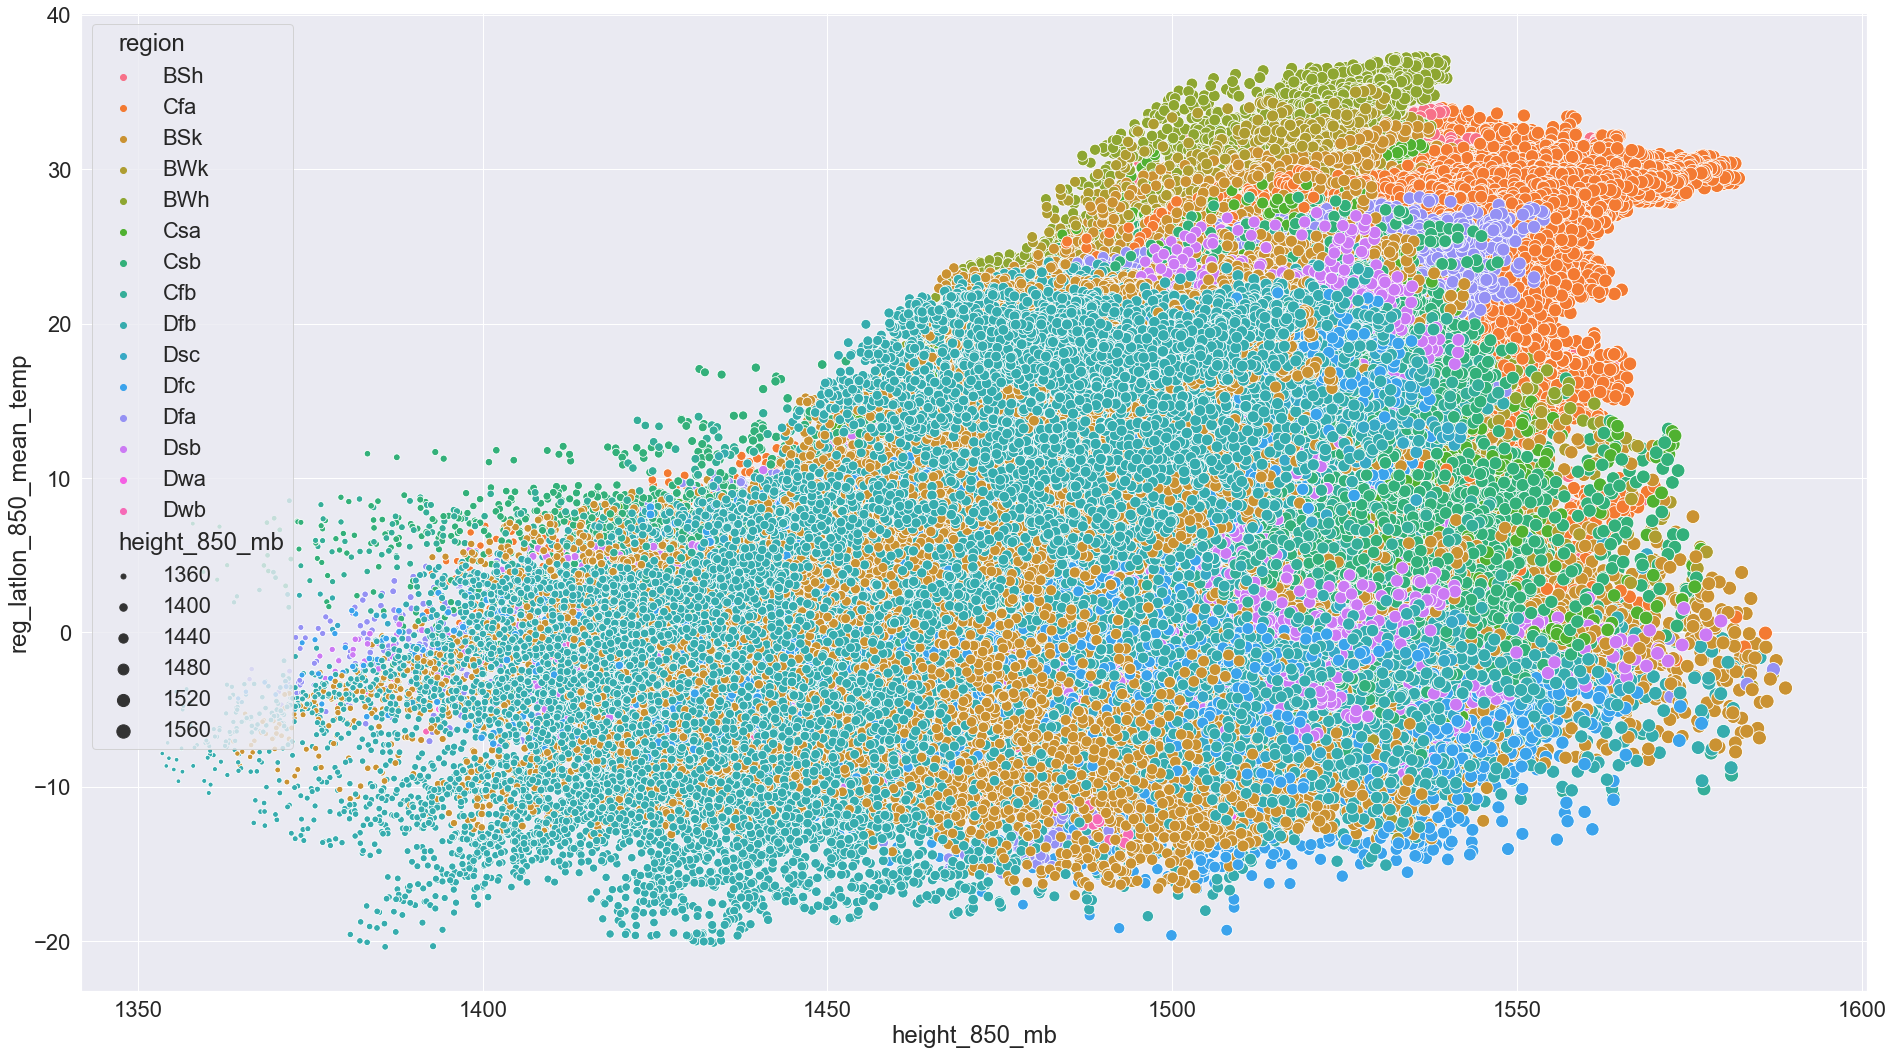

In [20]:
sns.scatterplot(data=df, x="height_850_mb", y='reg_latlon_850_mean_temp',  hue="region", size="height_850_mb", sizes=(20, 200))

In [21]:
def split_data(df, test_size=0.15):
    '''
    Takes in a data frame and the train size
    It returns train, validate , and test data frames
    with validate being 0.05 bigger than test and train has the rest of the data.
    '''
    train, test = train_test_split(df, test_size = test_size , random_state=27)
    train, validate = train_test_split(train, test_size = (test_size + 0.05)/(1-test_size), random_state=27)
    
    return train, validate, test

In [22]:
train, validate, test =split_data(df, test_size=0.15)

In [23]:
train.head()

region  elevation       lat       lon  startdate  potential_evap  \
116277    BSk       1800  0.454545  0.300000 2014-10-19          294.86   
237629    Csb       1100  0.727273  0.066667 2014-10-25          127.70   
272599    BSk        800  0.772727  0.700000 2016-06-29          481.48   
205713    Dfb       2000  0.636364  0.500000 2015-06-30          453.35   
120041    BSk       1900  0.454545  0.466667 2015-02-05          135.47   

        precip  barometric_pressure  all_atmos_precip  relative_humidity  \
116277    0.03             83362.52              8.53              28.94   
237629   63.74             89156.29             16.71              83.14   
272599   41.43             89665.38             22.36              54.72   
205713   24.78             77957.43             17.11              47.80   
120041    0.00             81613.28              6.06              62.50   

        sea_level_press  mean_temp  height_10_mb  height_100_mb  \
116277        101443.38  16.680867      30825.95       16475.47   
237629        101841.63   5.987106      30801.60       16340.47   
272599        101003.07  21.549640      31605.85       16624.04   
205713        101361.57  19.173942      31576.02       16662.35   
120041        102053.60   6.862285      30715.39       16357.43   

        height_500_mb  height_850_mb  zonal_wind_250mb  zonal_wind_925mb  \
116277        5796.30        1504.26             18.22             -0.87   
237629        5689.14        1504.33             24.22              1.52   
272599        5828.97        1492.70             23.68             -0.08   
205713        5875.87        1505.58             15.35              0.50   
120041        5755.62        1535.91             19.55              0.42   

        long_wind_250mb  long_wind_925mb elevation_range  region_bins  \
116277             3.46             2.04            high          Dry   
237629             1.08             3.10             mid    Temperate   
272599             2.35             1.04         top_low          Dry   
205713             5.52             1.09            high  Continental   
120041           -10.67             0.27            high          Dry   

        region_latlon_mean_temp  region_elevation_mean_temp  \
116277                16.500850                   11.332258   
237629                 8.032598                    8.469587   
272599                 9.343178                   11.032958   
205713                 6.867933                    7.330657   
120041                12.618897                   10.132137   

        region_bar_press_mean_temp  atmosphere_mean_temp  \
116277                   16.680867             16.680867   
237629                    5.987106              5.987106   
272599                   21.549640             21.549640   
205713                   19.173942             19.173942   
120041                    6.862285              6.862285   

        reg_barpress_precip_mean_temp  reg_latlon_850_mean_temp  
116277                      16.680867                 16.680867  
237629                       5.987106                  4.152904  
272599                      21.549640                 21.549640  
205713                      19.173942                 19.173942  
120041                       6.862285                  6.862285

In [24]:
def scale_data(train, validate, test):
    '''
    Takes in train, validate, test and a list of features to scale
    and scales those features.
    Returns df with new columns with scaled data
    '''
    scale_features= list(train.select_dtypes(include=np.number).columns)
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    minmax = pre.MinMaxScaler()
    minmax.fit(train[scale_features])
    
    train_scaled[scale_features] = pd.DataFrame(minmax.transform(train[scale_features]),
                                                  columns=train[scale_features].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[scale_features] = pd.DataFrame(minmax.transform(validate[scale_features]),
                                               columns=validate[scale_features].columns.values).set_index([validate.index.values])
    
    test_scaled[scale_features] = pd.DataFrame(minmax.transform(test[scale_features]),
                                                 columns=test[scale_features].columns.values).set_index([test.index.values])
    
    return train_scaled, validate_scaled, test_scaled

In [25]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [26]:
#all of the features
drivers = list(train.columns)
#drop startdate and target variable
drivers.remove('startdate')
drivers.remove('mean_temp')

In [27]:
def prep_for_model(train, validate, test, target, drivers):
    '''
    Takes in train, validate, and test data frames
    then splits  for X (all variables but target variable) 
    and y (only target variable) for each data frame
    '''
    #scale data
    train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)
    
    X_train = train_scaled[drivers]
    
    #make list of cat variables to make dummies for
    cat_vars = list(X_train.select_dtypes(exclude=np.number).columns)

    dummy_df_train = pd.get_dummies(X_train[cat_vars], dummy_na=False, drop_first=[True, True])
    X_train = pd.concat([X_train, dummy_df_train], axis=1).drop(columns=cat_vars)
    y_train = train[target]

    X_validate = validate_scaled[drivers]
    dummy_df_validate = pd.get_dummies(X_validate[cat_vars], dummy_na=False, drop_first=[True, True])
    X_validate = pd.concat([X_validate, dummy_df_validate], axis=1).drop(columns=cat_vars)
    y_validate = validate[target]

    X_test = test_scaled[drivers]
    dummy_df_test = pd.get_dummies(X_test[cat_vars], dummy_na=False, drop_first=[True, True])
    X_test = pd.concat([X_test, dummy_df_test], axis=1).drop(columns=cat_vars)
    y_test = test[target]

    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [28]:
X_train, y_train, X_validate, y_validate, X_test, y_test = prep_for_model(train, validate, test, 'mean_temp', drivers)

In [29]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)
# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)
# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)
# create the model object
lm2 = LinearRegression(normalize=True)
lm2.fit(X_train_degree2, y_train)

metric_df = pd.DataFrame(data=[
        {
            'model': 'Quadratic', 
            f'RMSE_train': metric.mean_squared_error(
                y_train,
                lm2.predict(X_train_degree2)) ** .5,
            f'RMSE_validate': metric.mean_squared_error(
                y_validate,
                lm2.predict(X_validate_degree2)) ** .5
        }])

metric_df

model    RMSE_train  RMSE_validate
0  Quadratic  6.069805e-14   6.032319e-14